In [1]:
# Only need to be run once to install dependencies:
# !conda install xlrd
# !conda install openpyxl
# !pip install vaderSentiment
# !conda install scipy

In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings

In [3]:
oly_uniq = pd.read_csv('Olympics_Postponed_Twitter_Unique.csv')
oly_uniq.keys()

Index(['Date', 'Title', 'Url', 'Language', 'Author', 'Avatar',
       'Category Details', 'Checked', 'City', 'Display URLs', 'Expanded URLs',
       'Full Name', 'Full Text', 'Gender', 'Hashtags', 'Impact', 'Impressions',
       'Latitude', 'Location Name', 'Longitude', 'Media Filter', 'Media URLs',
       'Mentioned Authors', 'Original Url', 'Thread Author',
       'Thread Created Date', 'Thread Entry Type', 'Thread Id', 'Thread URL',
       'Twitter Author ID', 'Twitter Channel Role', 'Twitter Followers',
       'Twitter Following', 'Twitter Reply Count', 'Twitter Reply to',
       'Twitter Retweet of', 'Twitter Retweets', 'Twitter Tweets',
       'Twitter Verified', 'Updated', 'Reach (new)'],
      dtype='object')

In [4]:
oly_uniq['Language'].head(20)

0     en
1     en
2     en
3     en
4     en
5     en
6     en
7     en
8     it
9     en
10    en
11    es
12    de
13    en
14    en
15    en
16    es
17    en
18    en
19    en
Name: Language, dtype: object

In [5]:
en_only = oly_uniq.loc[oly_uniq['Language'] == 'en']
en_only.head()

,Date,Title,Url,Language,Author,Avatar,Category Details,Checked,City,Display URLs,...,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Reply to,Twitter Retweet of,Twitter Retweets,Twitter Tweets,Twitter Verified,Updated,Reach (new)
0,2020-03-31 23:58:48.0,@TeamUSA Literally all of the 2012 Olympics fo...,http://twitter.com/arv5518/statuses/1245138508...,en,arv5518,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,NaN,...,3,76,0,http://twitter.com/TeamUSA/statuses/1245063460...,NaN,0,345,False,2020-10-05T16:39:32.631+0000,0
1,2020-03-31 23:57:17.0,@LanderVBALL @reesebatesvb @vbcoch @USAVBeach ...,http://twitter.com/alexptck3/statuses/12451381...,en,alexptck3,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,NaN,...,217,293,1,http://twitter.com/LanderVBALL/statuses/124511...,NaN,0,1600,False,2020-10-05T16:39:32.613+0000,9
2,2020-03-31 23:57:00.0,"""To be blunt, it started women's basketball in...",http://twitter.com/NBCOlympics/statuses/124513...,en,NBCOlympics,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,NaN,...,922572,2991,2,NaN,NaN,61,32017,True,2020-10-05T16:39:32.615+0000,67412
3,2020-03-31 23:56:25.0,@DetroitHandball @TeamHandball @USATH @USARugb...,http://twitter.com/CoachJax11/statuses/1245137...,en,CoachJax11,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,NaN,...,158,249,1,http://twitter.com/DetroitHandball/statuses/12...,NaN,0,792,False,2020-10-05T16:39:32.602+0000,0
4,2020-03-31 23:55:31.0,I beat my own record! The new one is 52!!! @US...,http://twitter.com/reesebatesvb/statuses/12451...,en,reesebatesvb,https://audiences.brandwatch.com/api/audiences...,NaN,False,Kansas City,NaN,...,30,79,0,NaN,NaN,1,24,False,2020-10-05T16:39:32.631+0000,0


In [6]:
analyser = SentimentIntensityAnalyzer()
warnings.filterwarnings('ignore')

In [7]:
print(en_only['Full Text'][3])
print(analyser.polarity_scores(en_only['Full Text'][3]))

@DetroitHandball @TeamHandball @USATH @USARugby I still love u
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6369}


In [8]:
en_only['vader_scores'] = [analyser.polarity_scores(x) for x in en_only['Full Text']]
en_only['vader_scores'].head(20)

0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2     {'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp...
3     {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...
4     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5     {'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp...
6     {'neg': 0.044, 'neu': 0.956, 'pos': 0.0, 'comp...
7     {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'comp...
9     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10    {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...
13    {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...
14    {'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'comp...
15    {'neg': 0.0, 'neu': 0.477, 'pos': 0.523, 'comp...
17    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
18    {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...
19    {'neg': 0.103, 'neu': 0.897, 'pos': 0.0, 'comp...
21    {'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'comp...
22    {'neg': 0.0, 'neu': 0.55, 'pos': 0.45, 'co

In [9]:
en_only['vader_scores'][2]['pos']

0.098

In [10]:
en_only['pos'] = [x['pos'] for x in en_only['vader_scores']]
en_only['pos'].head()

0    0.000
1    0.000
2    0.098
3    0.375
4    0.000
Name: pos, dtype: float64

In [11]:
en_only['neg'] = [x['neg'] for x in en_only['vader_scores']]
en_only['neg'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: neg, dtype: float64

In [12]:
from matplotlib import pyplot as plt

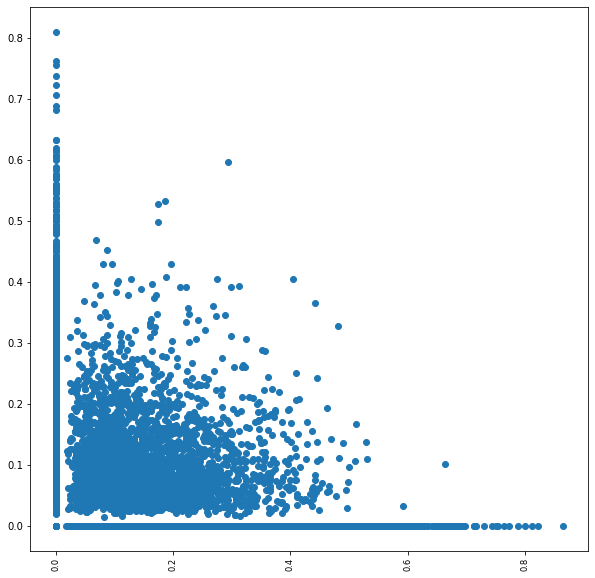

In [13]:
fig1, ax1 = plt.subplots(figsize = (10,10))
ax1.scatter(en_only['pos'], en_only['neg'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

In [14]:
type(en_only['Date'][0])

str

In [15]:
from datetime import datetime as dt

In [16]:
en_only['Datetime'] = en_only['Date'].astype('datetime64')
en_only['Datetime'][0]

Timestamp('2020-03-31 23:58:48')

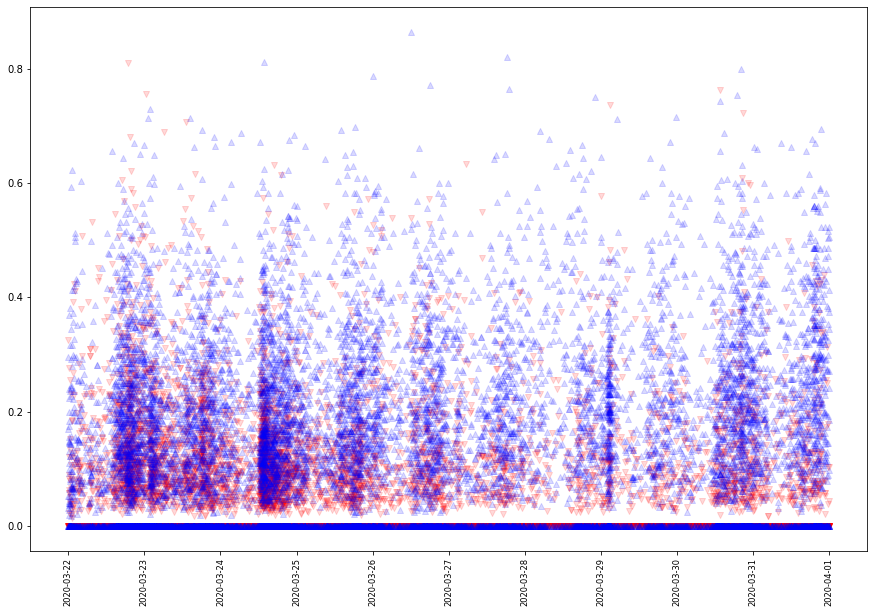

In [17]:
fig2, ax2 = plt.subplots(figsize = (15,10))
ax2.scatter(en_only['Datetime'], en_only['neg'], alpha = 0.15, color = 'red', marker = 'v')
ax2.scatter(en_only['Datetime'], en_only['pos'], alpha = 0.15, color = 'blue', marker = '^')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

In [18]:
pre_announce = en_only.loc[en_only['Datetime'] < '2020-03-24 00:00:00.0'].reset_index()
pre_announce.head()

,index,Date,Title,Url,Language,Author,Avatar,Category Details,Checked,City,...,Twitter Retweet of,Twitter Retweets,Twitter Tweets,Twitter Verified,Updated,Reach (new),vader_scores,pos,neg,Datetime
0,14126,2020-03-23 23:58:18.0,@Sportsnet @Tokyo2020 Why there not competing,http://twitter.com/brad69155150/statuses/12422...,en,brad69155150,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,...,NaN,0,1028,False,2020-10-05T16:39:20.852+0000,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,2020-03-23 23:58:18
1,14127,2020-03-23 23:57:33.0,@monicaabbott We need a Mercy Rule for this Vi...,http://twitter.com/bude149/statuses/1242239090...,en,bude149,https://audiences.brandwatch.com/api/audiences...,NaN,False,New York,...,NaN,0,2160,False,2020-10-05T16:39:20.855+0000,0,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...",0.217,0.0,2020-03-23 23:57:33
2,14128,2020-03-23 23:57:16.0,Do it now please @Tokyo2020,http://twitter.com/Ozsancak/statuses/124223902...,en,Ozsancak,https://audiences.brandwatch.com/api/audiences...,NaN,False,"Washington, D.C.",...,NaN,0,3889,False,2020-10-05T16:39:20.851+0000,0,"{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'comp...",0.365,0.0,2020-03-23 23:57:16
3,14129,2020-03-23 23:56:50.0,@sbregman87 @Aly_Raisman @TeamUSA @Simone_Bile...,http://twitter.com/pabloalvarezap/statuses/124...,en,pabloalvarezap,https://audiences.brandwatch.com/api/audiences...,NaN,False,Santiago,...,NaN,0,1114,False,2020-10-05T16:39:20.856+0000,317,"{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'comp...",0.205,0.0,2020-03-23 23:56:50
4,14130,2020-03-23 23:56:44.0,@KarissaSchweiz4 @Nike @WorldAthletics @TeamUS...,http://twitter.com/btm123/statuses/12422388842...,en,btm123,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,...,NaN,0,386,False,2020-10-05T16:39:20.848+0000,0,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...",0.109,0.0,2020-03-23 23:56:44


In [19]:
post_announce = en_only.loc[en_only['Datetime'] > '2020-03-24 00:00:00.0'].reset_index()
post_announce.head()

,index,Date,Title,Url,Language,Author,Avatar,Category Details,Checked,City,...,Twitter Retweet of,Twitter Retweets,Twitter Tweets,Twitter Verified,Updated,Reach (new),vader_scores,pos,neg,Datetime
0,0,2020-03-31 23:58:48.0,@TeamUSA Literally all of the 2012 Olympics fo...,http://twitter.com/arv5518/statuses/1245138508...,en,arv5518,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,...,NaN,0,345,False,2020-10-05T16:39:32.631+0000,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,2020-03-31 23:58:48
1,1,2020-03-31 23:57:17.0,@LanderVBALL @reesebatesvb @vbcoch @USAVBeach ...,http://twitter.com/alexptck3/statuses/12451381...,en,alexptck3,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,...,NaN,0,1600,False,2020-10-05T16:39:32.613+0000,9,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,2020-03-31 23:57:17
2,2,2020-03-31 23:57:00.0,"""To be blunt, it started women's basketball in...",http://twitter.com/NBCOlympics/statuses/124513...,en,NBCOlympics,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,...,NaN,61,32017,True,2020-10-05T16:39:32.615+0000,67412,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp...",0.098,0.0,2020-03-31 23:57:00
3,3,2020-03-31 23:56:25.0,@DetroitHandball @TeamHandball @USATH @USARugb...,http://twitter.com/CoachJax11/statuses/1245137...,en,CoachJax11,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,...,NaN,0,792,False,2020-10-05T16:39:32.602+0000,0,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.375,0.0,2020-03-31 23:56:25
4,4,2020-03-31 23:55:31.0,I beat my own record! The new one is 52!!! @US...,http://twitter.com/reesebatesvb/statuses/12451...,en,reesebatesvb,https://audiences.brandwatch.com/api/audiences...,NaN,False,Kansas City,...,NaN,1,24,False,2020-10-05T16:39:32.631+0000,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,2020-03-31 23:55:31


In [20]:
from scipy import stats

In [21]:
stats.describe(pre_announce['pos']).mean

0.10833103618016245

In [22]:
stats.describe(post_announce['pos']).mean

0.13627400845580837

In [23]:
stats.ttest_ind(pre_announce['pos'], post_announce['pos'])

Ttest_indResult(statistic=-10.431660370314153, pvalue=2.202370672221694e-25)